In [103]:
"""df.to_csv('cleaned_data_for_ML.csv', index=False) ""save this"" """
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder



In [104]:
df = pd.read_csv('data_annonce_1.csv')
df_copy = df.copy()

city_counts = df_copy['Localisation'].value_counts()
# print(city_counts)

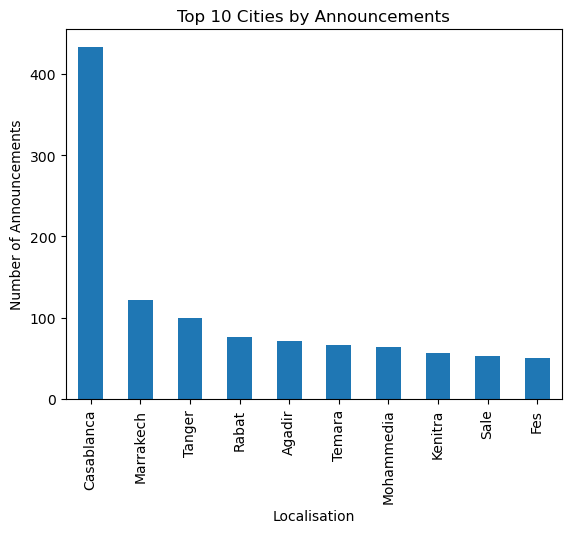

In [105]:
city_counts.head(10).plot(kind='bar', title='Top 10 Cities by Announcements')
plt.xlabel('Localisation')
plt.ylabel('Number of Announcements')
plt.show()

In [106]:
df_one_hot = pd.get_dummies(df_copy, columns=['Localisation'], prefix='Localisation', drop_first=True)

label_encoder = LabelEncoder()
df_copy['Localisation'] = label_encoder.fit_transform(df_copy['Localisation'])
# j'ai remplacer le nom de chaque localisation pour un chifre "label_encoder"
df_copy[['Localisation']]


,Localisation
0,49
1,49
2,2
3,21
4,36
...,...
1458,28
1459,21
1460,32
1461,19


In [107]:
df_copy

,EquipementURL,Title,Localisation,Price,Chambre,Salle de bain,Type,Secteur,Salons,Surface habitable,...,Concierge,Cuisine equipee,Duplex,Meuble,Parking,Securite,Terrasse,Date,Latitude,Longitude
0,https://www.avito.ma/fr/quartier_de_l'oc%C3%A9...,RBA-HA-1054 - Appartement Ã vendre Ã L'Ocean,49,1.200000e+06,1,1,Vendre,quartier de l'ocÃ©an,0.0,0.0,...,False,False,False,False,True,False,True,2024-01-30,34.022360,-6.834022
1,https://www.avito.ma/fr/guich_oudaya/apparteme...,RBA-SKH-TE-1053 - Appartement Ã vendre Ã Gui...,49,1.750000e+06,3,2,Vendre,guich oudaya,3.0,3.0,...,False,False,False,False,False,False,True,2024-10-12,34.022360,-6.834022
2,https://www.avito.ma/fr/hay_mohammadi/appartem...,Appartement Ã vendre 63 mÂ² Ã Agadir,2,6.000000e+05,2,1,Vendre,hay mohammadi,1.0,60.0,...,False,False,False,False,False,False,False,2024-12-04,30.420516,-9.583853
3,https://www.avito.ma/fr/dar_bouazza/appartemen...,Appartement Ã vendre 81 mÂ² Ã Dar Bouazza,21,1.350000e+06,2,2,Vendre,toute la ville,1.0,81.0,...,False,False,False,False,False,False,False,2024-10-17,33.521583,-7.816437
4,https://www.avito.ma/fr/gu%C3%A9liz/appartemen...,Appartement 81 mÂ² avec piscine a gueliz,36,7.695000e+05,2,1,Vendre,guÃ©liz,1.0,81.0,...,False,False,False,False,True,False,False,2024-03-16,31.625826,-7.989161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458,https://www.avito.ma/fr/fnideq/appartements/Ap...,Appartement Ã vendre Ã Alcudia Smir,28,1.350000e+06,3,2,Vendre,toute la ville,1.0,113.0,...,False,False,False,False,False,False,False,2024-01-05,35.839209,-5.361425
1459,https://www.avito.ma/fr/dar_bouazza/appartemen...,Appartement Ã vendre 100 mÂ² Ã Dar Bouazza,21,1.062928e+06,3,2,Vendre,toute la ville,1.0,100.0,...,False,False,False,False,False,False,False,2024-03-02,33.521583,-7.816437
1460,https://www.avito.ma/fr/mimosas/appartements/A...,Appartement Ã vendre 207 mÂ² Ã KÃ©nitra,32,1.450000e+06,3,2,Vendre,mimosas,2.0,207.0,...,True,False,False,False,True,False,True,2024-03-19,34.264570,-6.570169
1461,https://www.avito.ma/vi/55508279.htm,appartement a vendre Bourgogne,19,1.000000e+06,2,2,Vendre,bourgogne,2.0,2.0,...,False,False,False,False,False,False,False,2024-08-22,33.594514,-7.620028


In [108]:
print(df_copy.columns)


Index(['EquipementURL', 'Title', 'Localisation', 'Price', 'Chambre',
       'Salle de bain', 'Type', 'Secteur', 'Salons', 'Surface habitable',
       'Age de bien', 'Etage', 'Ascenseur', 'Balcon', 'Chauffage',
       'Climatisation', 'Concierge', 'Cuisine equipee', 'Duplex', 'Meuble',
       'Parking', 'Securite', 'Terrasse', 'Date', 'Latitude', 'Longitude'],
      dtype='object')


In [109]:
columns_to_convert = ['Cuisine equipee', 'Duplex', 'Meuble', 'Parking', 'Securite', 'Terrasse']

existing_columns = [col for col in columns_to_convert if col in df_copy.columns]

df_copy[existing_columns] = df_copy[existing_columns].astype(int)

print(df_copy[existing_columns].head())


   Cuisine equipee  Duplex  Meuble  Parking  Securite  Terrasse
0                0       0       0        1         0         1
1                0       0       0        0         0         1
2                0       0       0        0         0         0
3                0       0       0        0         0         0
4                0       0       0        1         0         0


In [110]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

numeric_columns = ['Price', 'Chambre', 'Salle de bain', 'Salons', 'Surface habitable', 
                   'Age de bien', 'Etage', 'Latitude', 'Longitude']

numeric_columns = [col for col in numeric_columns if col in df_copy.columns]

scaler = MinMaxScaler()  

df_copy[numeric_columns] = scaler.fit_transform(df_copy[numeric_columns])

print(df_copy[numeric_columns].head())


      Price   Chambre  Salle de bain  Salons  Surface habitable  Age de bien  \
0  0.028717  0.000000       0.006369   0.000           0.000000         0.00   
1  0.033032  0.222222       0.012739   0.375           0.003409         0.12   
2  0.024010  0.111111       0.006369   0.125           0.068182         0.08   
3  0.029894  0.111111       0.012739   0.125           0.092045         0.08   
4  0.025339  0.111111       0.006369   0.125           0.092045         0.08   

   Etage  Latitude  Longitude  
0  0.625  0.888130   0.803561  
1  0.250  0.888130   0.803561  
2  0.375  0.851359   0.769030  
3  0.125  0.883017   0.791224  
4  0.375  0.863664   0.789055  


In [111]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

numerical_features = ['Chambre', 'Salle de bain', 'Surface habitable', 'Salons', 'Etage', 'Age de bien']
categorical_features = ['Secteur']

numerical_features = [col for col in numerical_features if col in df_copy.columns]
categorical_features = [col for col in categorical_features if col in df_copy.columns]

X = df_copy[numerical_features + categorical_features]
y = df_copy['Price']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ]
)

X_preprocessed = preprocessor.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)


In [112]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialisez et entraînez le modèle
model = LinearRegression()
model.fit(X_train, y_train)

# Faites des prédictions
y_pred = model.predict(X_test)

# Évaluez le modèle
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Coefficient of Determination (R^2): {r2}")


Mean Squared Error (MSE): 0.0032901133331134248
Coefficient of Determination (R^2): 0.010009518531224781


In [113]:
# Obtenez les coefficients pour les variables numériques et catégoriques
feature_names = numerical_features + list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features))
coefficients = model.coef_

# Affichez les résultats
for name, coef in zip(feature_names, coefficients):
    print(f"{name}: {coef:.4f}")


Chambre: 0.0014
Salle de bain: 0.0002
Surface habitable: -0.0004
Salons: 0.0008
Etage: -0.0003
Age de bien: 0.0001
Secteur_2 mars: 0.0049
Secteur_abattoirs: -0.0042
Secteur_abbadi: -0.0019
Secteur_abbadi braika: 0.0010
Secteur_abdelmoumen: 0.0028
Secteur_abouab sala: -0.0048
Secteur_achakar: 0.0029
Secteur_achennad: -0.0109
Secteur_afaq: -0.0010
Secteur_agdal: 0.0087
Secteur_ahlane: -0.0096
Secteur_ain amiyer: -0.0055
Secteur_ain atig: 0.0042
Secteur_ain el hayat: 0.0000
Secteur_ain haroun: 0.0006
Secteur_ain sebaa: -0.0025
Secteur_al boustane: 0.0000
Secteur_al fath: 0.0041
Secteur_al fida: -0.0004
Secteur_al filline: -0.0006
Secteur_al hadiqa: -0.0042
Secteur_al maghrib al arabi: 0.0034
Secteur_al moustakbal: -0.0051
Secteur_al qods: -0.0057
Secteur_al wifaq: 0.0000
Secteur_allal el fassi: 0.0005
Secteur_almaz: 0.0000
Secteur_amerchich: -0.0018
Secteur_amicales: 0.0031
Secteur_amsernate: -0.0009
Secteur_andalous: -0.0067
Secteur_anfa: -0.0058
Secteur_annakhil: 0.0046
Secteur_anza: -0

In [114]:
from sklearn.model_selection import train_test_split


In [115]:
# Variables indépendantes (X) et variable cible (y)
X = df_copy[['Chambre', 'Salle de bain', 'Surface habitable', 'Salons', 'Etage', 'Age de bien']]  # Exemple
y = df_copy['Price']  # Cible


In [116]:
# Division des données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vérifiez les dimensions des ensembles
print(f"Taille de l'ensemble d'entraînement : {X_train.shape}")
print(f"Taille de l'ensemble de test : {X_test.shape}")


Taille de l'ensemble d'entraînement : (1170, 6)
Taille de l'ensemble de test : (293, 6)


In [117]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialiser le modèle de régression linéaire
model = LinearRegression()

# Entraîner le modèle sur l'ensemble d'entraînement
model.fit(X_train, y_train)

# Prédire sur l'ensemble de test
y_pred = model.predict(X_test)

# Calculer l'erreur quadratique moyenne (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Calculer le coefficient de détermination R²
r2 = r2_score(y_test, y_pred)

# Afficher les résultats
print(f"RMSE : {rmse}")
print(f"R² : {r2}")


RMSE : 0.05741923293859869
R² : 0.007946865234582767


/usr/lib/python3/dist-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [118]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Initialiser le modèle de régression linéaire
model = LinearRegression()

# Entraîner le modèle sur l'ensemble d'entraînement
model.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred = model.predict(X_test)

# Calculer l'erreur quadratique moyenne (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Calculer le score R²
r2 = r2_score(y_test, y_pred)

# Afficher les résultats
print(f"RMSE : {rmse}")
print(f"R² : {r2}")


RMSE : 0.05741923293859869
R² : 0.007946865234582767


In [119]:
from sklearn.metrics import mean_squared_error, r2_score

# Prédictions sur l'ensemble de test
y_pred = model.predict(X_test)

# Calcul du MSE (Mean Squared Error)
mse = mean_squared_error(y_test, y_pred)

# Calcul du R² (Coefficient de détermination)
r2 = r2_score(y_test, y_pred)

# Affichage des résultats
print(f"MSE : {mse}")
print(f"R² : {r2}")


MSE : 0.003296968311257057
R² : 0.007946865234582767


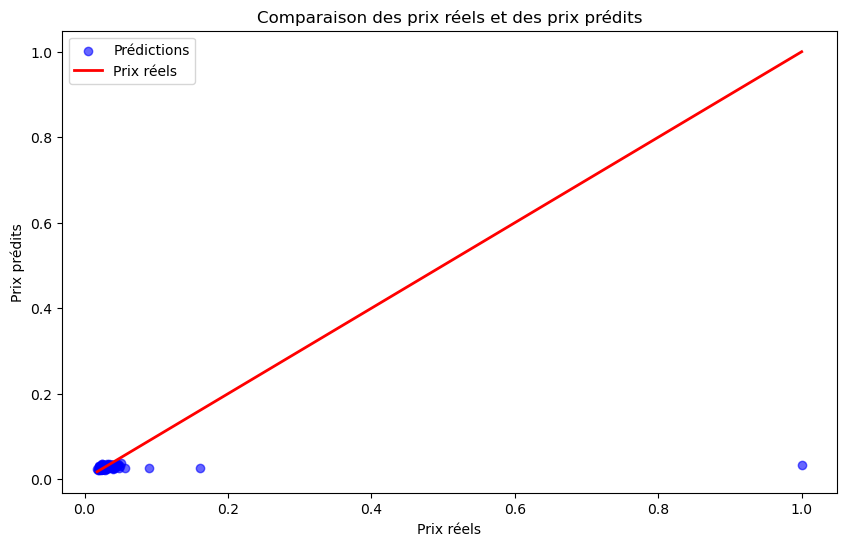

In [120]:
import matplotlib.pyplot as plt

# Afficher la comparaison entre les prix réels et les prix prédits
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label='Prédictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, label='Prix réels')
plt.xlabel('Prix réels')
plt.ylabel('Prix prédits')
plt.title('Comparaison des prix réels et des prix prédits')
plt.legend()
plt.show()


In [121]:
# Créer la variable cible has_elevator en fonction de la présence de l'ascenseur
df_copy['has_elevator'] = df_copy['Ascenseur'].apply(lambda x: 1 if x else 0)

# Afficher les premières lignes pour vérifier
print(df_copy[['Ascenseur', 'has_elevator']].head())


   Ascenseur  has_elevator
0       True             1
1      False             0
2      False             0
3      False             0
4       True             1


In [122]:
# Sélectionner les colonnes pertinentes comme variables indépendantes
X = df_copy[['Surface habitable', 'Chambre', 'Salle de bain', 'Price']]  # Exemple de variables indépendantes

# Variable cible (présence ou absence d'ascenseur)
y = df_copy['has_elevator']

# Afficher un aperçu des données
print(X.head())
print(y.head())


   Surface habitable   Chambre  Salle de bain     Price
0           0.000000  0.000000       0.006369  0.028717
1           0.003409  0.222222       0.012739  0.033032
2           0.068182  0.111111       0.006369  0.024010
3           0.092045  0.111111       0.012739  0.029894
4           0.092045  0.111111       0.006369  0.025339
0    1
1    0
2    0
3    0
4    1
Name: has_elevator, dtype: int64


In [123]:
df_copy = df_copy.dropna(subset=['Price', 'has_elevator', 'Surface habitable', 'Chambre', 'Salle de bain'])


has_elevator
0    1104
1     359
Name: count, dtype: int64


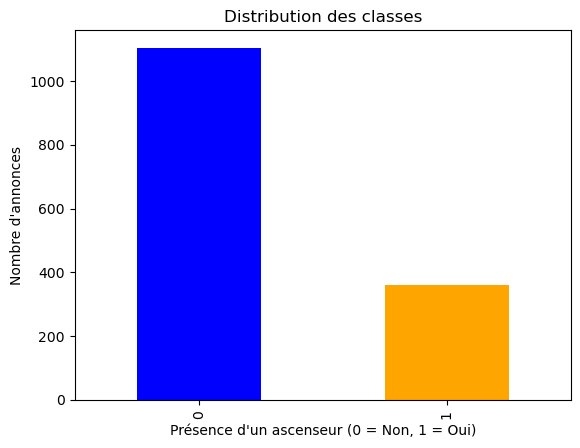

In [124]:
# Vérifier la distribution des classes
class_distribution = df_copy['has_elevator'].value_counts()
print(class_distribution)

# Visualisation (facultatif)
import matplotlib.pyplot as plt

class_distribution.plot(kind='bar', color=['blue', 'orange'])
plt.title("Distribution des classes")
plt.xlabel("Présence d'un ascenseur (0 = Non, 1 = Oui)")
plt.ylabel("Nombre d'annonces")
plt.show()


In [125]:
from sklearn.utils import resample

# Séparer les classes majoritaires et minoritaires
majority = df_copy[df_copy['has_elevator'] == 0]
minority = df_copy[df_copy['has_elevator'] == 1]

# Suréchantillonnage de la classe minoritaire
minority_oversampled = resample(minority,
                                replace=True,    # Échantillonnage avec remplacement
                                n_samples=len(majority),  # Même taille que la classe majoritaire
                                random_state=42)  # Reproductibilité

# Combiner les deux classes
df_copy_balanced = pd.concat([majority, minority_oversampled])

# Vérifier la nouvelle distribution
print(df_copy_balanced['has_elevator'].value_counts())


has_elevator
0    1104
1    1104
Name: count, dtype: int64


In [126]:
# Sous-échantillonnage de la classe majoritaire
majority_undersampled = resample(majority,
                                 replace=False,    # Pas de remplacement
                                 n_samples=len(minority),  # Même taille que la classe minoritaire
                                 random_state=42)

# Combiner les deux classes
df_copy_balanced = pd.concat([majority_undersampled, minority])

# Vérifier la nouvelle distribution
print(df_copy_balanced['has_elevator'].value_counts())


has_elevator
0    359
1    359
Name: count, dtype: int64


In [127]:
from imblearn.over_sampling import SMOTE

# Préparer les données pour SMOTE
X = df_copy[['Surface habitable', 'Chambre', 'Salle de bain', 'Price']]  # Variables indépendantes
y = df_copy['has_elevator']  # Variable cible

# Appliquer SMOTE
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

# Vérifier la nouvelle distribution
print(y_smote.value_counts())


has_elevator
1    1104
0    1104
Name: count, dtype: int64


In [128]:
from imblearn.over_sampling import SMOTE

# Préparer les données pour SMOTE
X = df_copy[['Surface habitable', 'Chambre', 'Salle de bain', 'Price']]  # Variables indépendantes
y = df_copy['has_elevator']  # Variable cible

# Appliquer SMOTE
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

# Vérifier la nouvelle distribution
print(y_smote.value_counts())


has_elevator
1    1104
0    1104
Name: count, dtype: int64


In [129]:
from sklearn.model_selection import train_test_split

# Séparer les données en variables indépendantes (X) et cible (y)
X = df_copy[['Surface habitable', 'Chambre', 'Salle de bain', 'Price']]  # Colonnes d'entrée
y = df_copy['has_elevator']  # Variable cible

# Division des données (80% entraînement, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Vérification des tailles des ensembles
print(f"Taille de l'ensemble d'entraînement : {X_train.shape}")
print(f"Taille de l'ensemble de test : {X_test.shape}")


Taille de l'ensemble d'entraînement : (1170, 4)
Taille de l'ensemble de test : (293, 4)


In [130]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Modèles à entraîner
models = {
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42, n_estimators=100),
    "Support Vector Machine (SVM)": SVC(random_state=42)
}

# Résultats pour chaque modèle
for name, model in models.items():
    print(f"### {name} ###")
    # Entraîner le modèle
    model.fit(X_train, y_train)
    
    # Prédictions sur l'ensemble de test
    y_pred = model.predict(X_test)
    
    # Évaluation des performances
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    print("-" * 50)


### Logistic Regression ###
Accuracy: 0.7508532423208191

Classification Report:
               precision    recall  f1-score   support

           0       0.75      1.00      0.86       221
           1       0.00      0.00      0.00        72

    accuracy                           0.75       293
   macro avg       0.38      0.50      0.43       293
weighted avg       0.57      0.75      0.65       293

--------------------------------------------------
### Decision Tree ###
Accuracy: 0.7372013651877133

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.83      0.83       221
           1       0.46      0.44      0.45        72

    accuracy                           0.74       293
   macro avg       0.64      0.64      0.64       293
weighted avg       0.73      0.74      0.74       293

--------------------------------------------------
### Random Forest ###
Accuracy: 0.757679180887372

Classification Report:
            

In [131]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Créer et entraîner la régression logistique
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

# Créer et entraîner l'arbre de décision
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [132]:
models = {
    "Logistic Regression": log_reg,
    "Decision Tree": decision_tree
}



### Logistic Regression ###
Accuracy: 0.7509
Precision: 0.0000
Recall: 0.0000
F1-Score: 0.0000
AUC-ROC: 0.5068

### Decision Tree ###
Accuracy: 0.7372
Precision: 0.4638
Recall: 0.4444
F1-Score: 0.4539
AUC-ROC: 0.6452


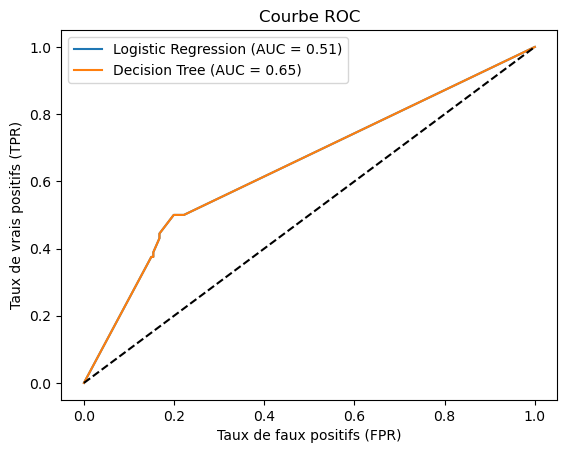

In [133]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Fonction d'évaluation des modèles
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    metrics = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, zero_division=0),
        "Recall": recall_score(y_test, y_pred, zero_division=0),
        "F1-Score": f1_score(y_test, y_pred, zero_division=0),
        "AUC-ROC": roc_auc_score(y_test, y_proba) if y_proba is not None else "N/A",
    }

    return metrics, y_pred, y_proba

# Exemple d'évaluation sur plusieurs modèles
models = {"Logistic Regression": log_reg, "Decision Tree": decision_tree}  # Remplacez avec vos modèles
results = {}

for name, model in models.items():
    metrics, y_pred, y_proba = evaluate_model(model, X_test, y_test)
    results[name] = metrics

# Afficher les résultats
for model_name, metrics in results.items():
    print(f"\n### {model_name} ###")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}" if isinstance(value, float) else f"{metric}: {value}")

    # Tracer la courbe ROC si applicable
    if metrics["AUC-ROC"] != "N/A":
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        plt.plot(fpr, tpr, label=f"{model_name} (AUC = {metrics['AUC-ROC']:.2f})")

# Courbe ROC
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("Taux de faux positifs (FPR)")
plt.ylabel("Taux de vrais positifs (TPR)")
plt.title("Courbe ROC")
plt.legend()
plt.show()


In [134]:
# Afficher les coefficients du modèle de régression
coefficients = pd.DataFrame(log_reg.coef_[0], X.columns, columns=['Coefficient'])
print(coefficients)


                   Coefficient
Surface habitable    -0.222890
Chambre               1.913272
Salle de bain        -0.445338
Price                 0.999048


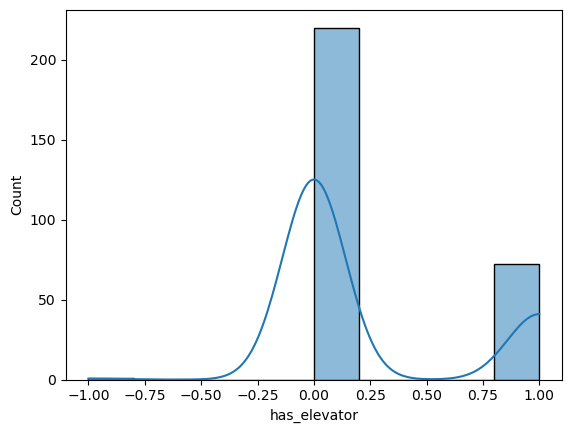

ShapiroResult(statistic=0.5557979941368103, pvalue=1.2116002939352746e-26)

In [135]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Prédictions du modèle
y_pred = log_reg.predict(X_test)

# Calcul des résidus
residuals = y_test - y_pred

# Graphique des résidus
sns.histplot(residuals, kde=True)
plt.show()

# Test de normalité avec le test de Shapiro-Wilk
stats.shapiro(residuals)


In [136]:
coeff_log_reg = pd.DataFrame(log_reg.coef_[0], X.columns, columns=['Coefficient'])
print(coeff_log_reg)


                   Coefficient
Surface habitable    -0.222890
Chambre               1.913272
Salle de bain        -0.445338
Price                 0.999048


In [137]:
feature_importances = decision_tree.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print(feature_importance_df)


             Feature  Importance
3              Price    0.608082
0  Surface habitable    0.240333
1            Chambre    0.084690
2      Salle de bain    0.066896


In [138]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

feature_importances_rf = rf.feature_importances_
feature_importance_df_rf = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances_rf
}).sort_values(by='Importance', ascending=False)

print(feature_importance_df_rf)


             Feature  Importance
3              Price    0.623889
0  Surface habitable    0.262390
2      Salle de bain    0.062068
1            Chambre    0.051653


In [139]:
y_pred=rf.predict(X_test)

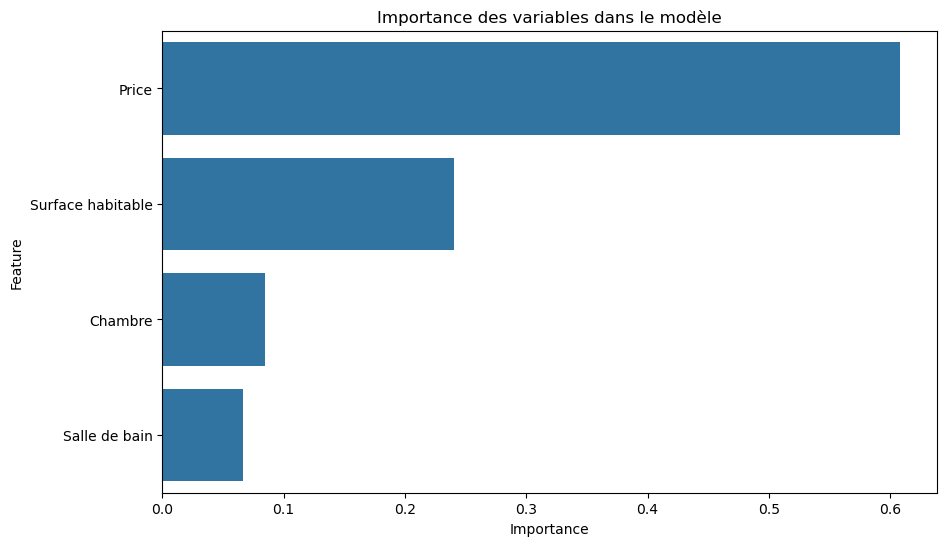

In [140]:
import matplotlib.pyplot as plt

# Graphique des importances des variables (par exemple pour un arbre de décision ou une forêt aléatoire)
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title("Importance des variables dans le modèle")
plt.show()


[[192  29]
 [ 42  30]]


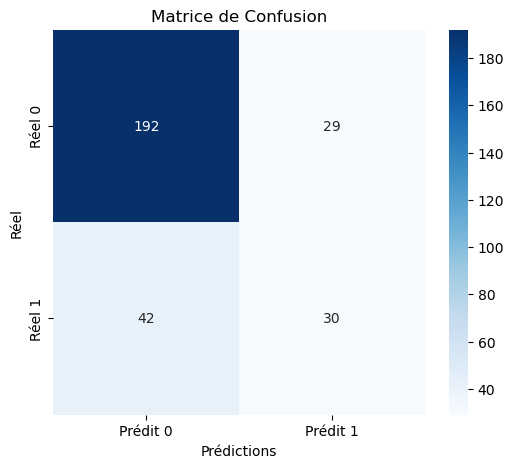

In [141]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Supposons que y_test soit les valeurs réelles et y_pred les valeurs prédites


# Calculer la matrice de confusion
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Création de la figure et personnalisation
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Prédit 0', 'Prédit 1'], yticklabels=['Réel 0', 'Réel 1'])

# Ajouter des labels et un titre
plt.title('Matrice de Confusion')
plt.xlabel('Prédictions')
plt.ylabel('Réel')
plt.show()


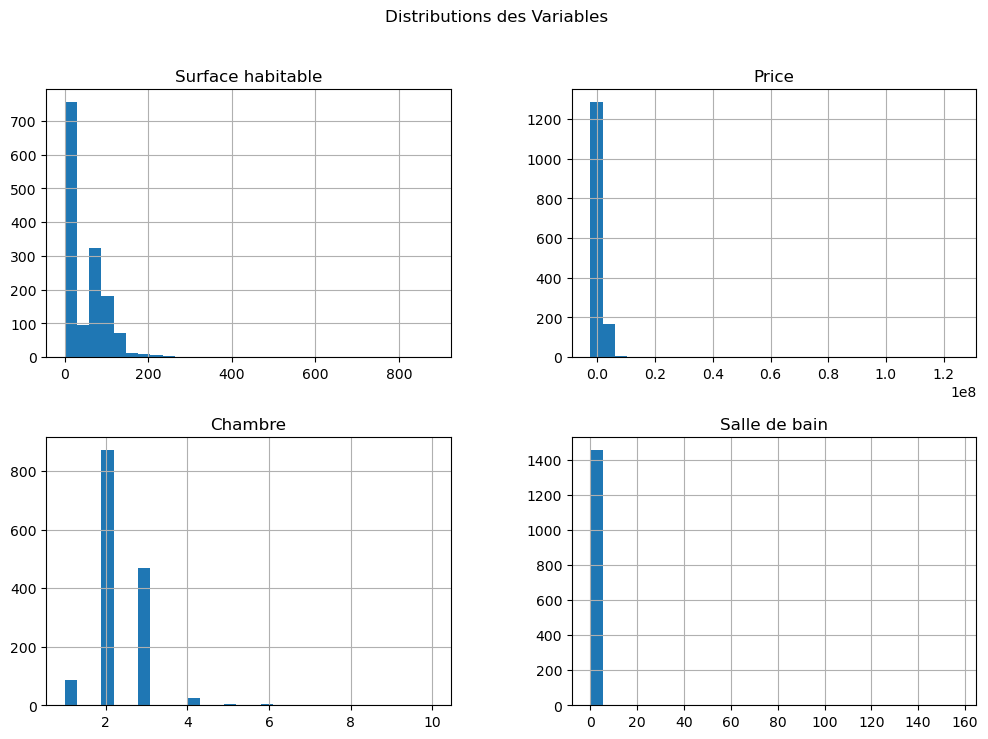

In [142]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogrammes pour quelques variables
df[['Surface habitable', 'Price', 'Chambre', 'Salle de bain']].hist(bins=30, figsize=(12, 8))
plt.suptitle('Distributions des Variables')
plt.show()


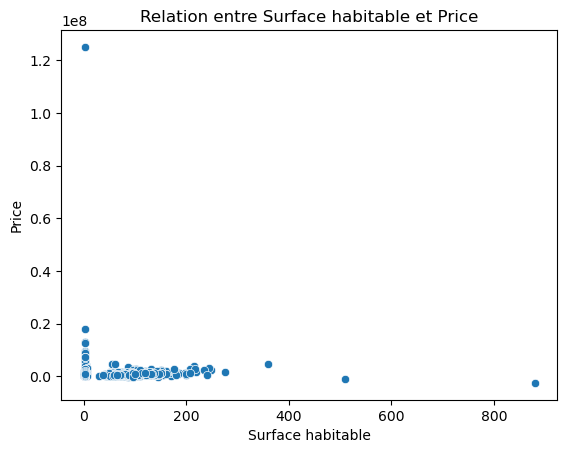

In [143]:
sns.scatterplot(x='Surface habitable', y='Price', data=df)
plt.title('Relation entre Surface habitable et Price')
plt.show()


In [144]:
numeric_df = df_copy.select_dtypes(include=['float64', 'int64'])
corr_matrix = numeric_df.corr()

print(df_copy.dtypes)

EquipementURL         object
Title                 object
Localisation           int64
Price                float64
Chambre              float64
Salle de bain        float64
Type                  object
Secteur               object
Salons               float64
Surface habitable    float64
Age de bien          float64
Etage                float64
Ascenseur               bool
Balcon                  bool
Chauffage               bool
Climatisation           bool
Concierge               bool
Cuisine equipee        int64
Duplex                 int64
Meuble                 int64
Parking                int64
Securite               int64
Terrasse               int64
Date                  object
Latitude             float64
Longitude            float64
has_elevator           int64
dtype: object


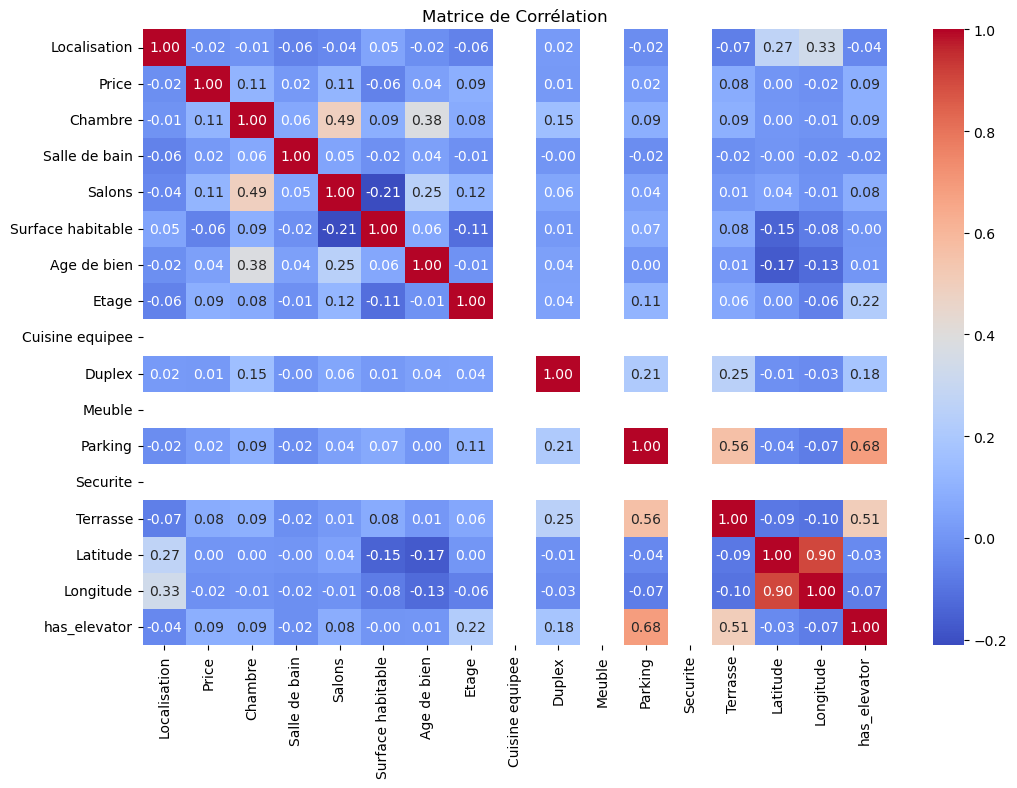

In [145]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matrice de Corrélation')
plt.show()


In [146]:
print(numeric_df.isnull().sum())

# Remplissez les valeurs manquantes par la moyenne (ou toute autre méthode appropriée)
numeric_df = numeric_df.fillna(numeric_df.mean())


Localisation         0
Price                0
Chambre              0
Salle de bain        0
Salons               0
Surface habitable    0
Age de bien          0
Etage                0
Cuisine equipee      0
Duplex               0
Meuble               0
Parking              0
Securite             0
Terrasse             0
Latitude             0
Longitude            0
has_elevator         0
dtype: int64


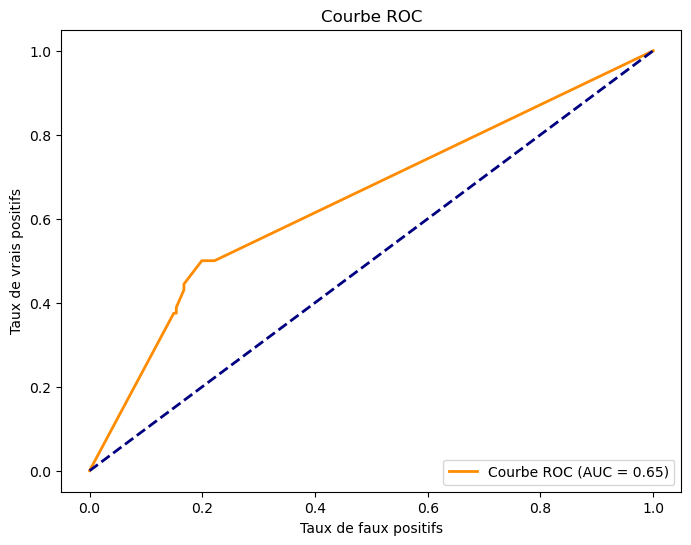

In [147]:
from sklearn.metrics import roc_curve, auc

y_pred_proba = model.predict_proba(X_test)

# Calcul des courbes ROC pour un modèle (par exemple, régression logistique)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:, 1])  # y_pred_proba contient les probabilités prédites
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Courbe ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC')
plt.legend(loc='lower right')
plt.show()



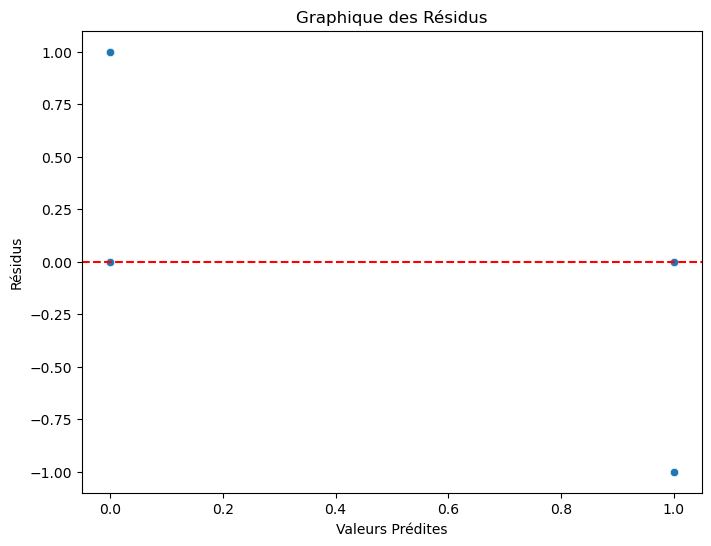

In [148]:
# Calcul des résidus pour un modèle de régression
residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Graphique des Résidus')
plt.xlabel('Valeurs Prédites')
plt.ylabel('Résidus')
plt.show()


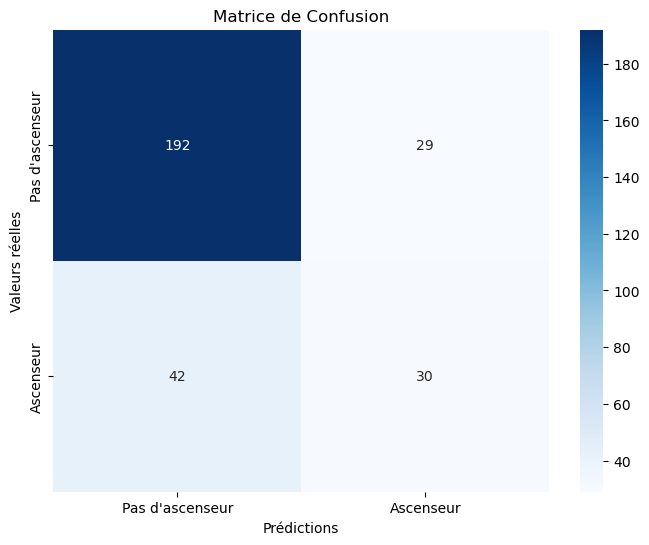

In [149]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calcul de la matrice de confusion
cm = confusion_matrix(y_test, y_pred)

# Affichage de la matrice de confusion sous forme de heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Pas d\'ascenseur', 'Ascenseur'], yticklabels=['Pas d\'ascenseur', 'Ascenseur'])
plt.xlabel('Prédictions')
plt.ylabel('Valeurs réelles')
plt.title('Matrice de Confusion')
plt.show()


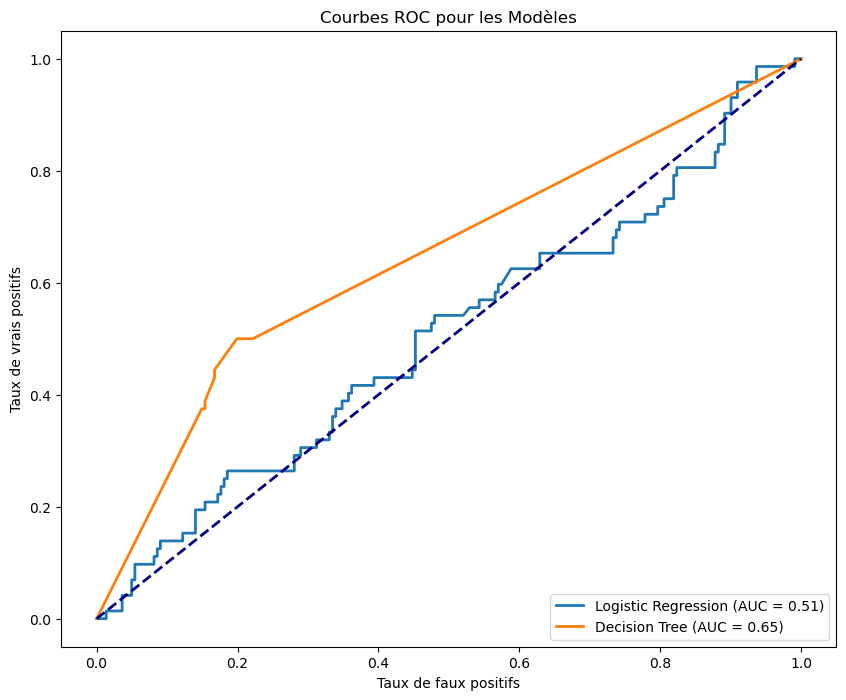

In [150]:
# Exemple pour plusieurs modèles
models = {'Logistic Regression': log_reg, 'Decision Tree': decision_tree}
plt.figure(figsize=(10, 8))

for name, model in models.items():
    y_pred_proba = model.predict_proba(X_test)  # Probabilités prédites
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbes ROC pour les Modèles')
plt.legend(loc='lower right')
plt.show()


In [151]:
from sklearn.preprocessing import PolynomialFeatures

# Créer des variables polynomiales de degré 2
poly = PolynomialFeatures(degree=2)  # include_bias=False pour ignorer la constante
X_poly = poly.fit_transform(X_train)

# Afficher les noms des nouvelles variables
poly_features = poly.get_feature_names_out(input_features=X_train.columns)
print("Variables polynomiales :", poly_features)


Variables polynomiales : ['1' 'Surface habitable' 'Chambre' 'Salle de bain' 'Price'
 'Surface habitable^2' 'Surface habitable Chambre'
 'Surface habitable Salle de bain' 'Surface habitable Price' 'Chambre^2'
 'Chambre Salle de bain' 'Chambre Price' 'Salle de bain^2'
 'Salle de bain Price' 'Price^2']


In [152]:
# Réentraîner le modèle avec X_poly
model_poly = LogisticRegression()
model_poly.fit(X_poly, y_train)

# Évaluer les performances sur les données de test
X_test_poly = poly.transform(X_test)
y_pred = model_poly.predict(X_test_poly)


In [153]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[220,   1],
       [ 72,   0]])